In [352]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [353]:
from google.colab import files
uploaded = files.upload()

Saving occupancy_6005.csv to occupancy_6005 (4).csv


In [354]:
df = pd.read_csv("occupancy_6005.csv")

In [355]:
# Displaying the first 15 rows of the dataset
df.head(15)

,timestamp,value
0,2015-09-01 13:45:00,3.06
1,2015-09-01 13:50:00,6.44
2,2015-09-01 13:55:00,5.17
3,2015-09-01 14:00:00,3.83
4,2015-09-01 14:05:00,4.50
5,2015-09-01 14:20:00,2.94
6,2015-09-01 14:25:00,2.28
7,2015-09-01 14:35:00,1.67
8,2015-09-01 14:40:00,18.83
9,2015-09-01 14:45:00,12.00


In [356]:
# Shape of the dataset
df.shape

(2380, 2)

In [357]:
# Main statistics of the dataset
df.describe()

,value
count,2380.000000
mean,4.495147
std,3.404555
min,0.000000
25%,1.940000
50%,3.830000
75%,6.170000
max,22.280000


In [358]:
# Dropping rows with an missing values
df = df.dropna()

In [359]:
df

,timestamp,value
0,2015-09-01 13:45:00,3.06
1,2015-09-01 13:50:00,6.44
2,2015-09-01 13:55:00,5.17
3,2015-09-01 14:00:00,3.83
4,2015-09-01 14:05:00,4.50
...,...,...
2375,2015-09-17 16:04:00,9.28
2376,2015-09-17 16:09:00,5.06
2377,2015-09-17 16:14:00,3.44
2378,2015-09-17 16:19:00,8.50


In [360]:
# Modifying the column timestamp to type datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [361]:
df.head(10)

,timestamp,value
0,2015-09-01 13:45:00,3.06
1,2015-09-01 13:50:00,6.44
2,2015-09-01 13:55:00,5.17
3,2015-09-01 14:00:00,3.83
4,2015-09-01 14:05:00,4.50
5,2015-09-01 14:20:00,2.94
6,2015-09-01 14:25:00,2.28
7,2015-09-01 14:35:00,1.67
8,2015-09-01 14:40:00,18.83
9,2015-09-01 14:45:00,12.00


In [362]:
# Deriving a new column "timestamp_mm" using function "astype"
df['timestamp_mm'] = df['timestamp'].astype('int64') # Type convertion to "int64"

In [363]:
df.head(10)

,timestamp,value,timestamp_mm
0,2015-09-01 13:45:00,3.06,1441115100000000000
1,2015-09-01 13:50:00,6.44,1441115400000000000
2,2015-09-01 13:55:00,5.17,1441115700000000000
3,2015-09-01 14:00:00,3.83,1441116000000000000
4,2015-09-01 14:05:00,4.50,1441116300000000000
5,2015-09-01 14:20:00,2.94,1441117200000000000
6,2015-09-01 14:25:00,2.28,1441117500000000000
7,2015-09-01 14:35:00,1.67,1441118100000000000
8,2015-09-01 14:40:00,18.83,1441118400000000000
9,2015-09-01 14:45:00,12.00,1441118700000000000


In [364]:
# Drop timestamp column as further computations can be performed on timestamp_mm column
df.drop('timestamp', axis=1, inplace=True) #Inplace parameter makes changes on the existing dataframe

In [365]:
df

,value,timestamp_mm
0,3.06,1441115100000000000
1,6.44,1441115400000000000
2,5.17,1441115700000000000
3,3.83,1441116000000000000
4,4.50,1441116300000000000
...,...,...
2375,9.28,1442505840000000000
2376,5.06,1442506140000000000
2377,3.44,1442506440000000000
2378,8.50,1442506740000000000


In [366]:
# Displaying preprocessed columns and its datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   value         2380 non-null   float64
 1   timestamp_mm  2380 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 37.3 KB


In [367]:
# Normalization of features
import pandas as pd

min_timestamp = df['timestamp_mm'].min()
max_timestamp = df['timestamp_mm'].max()

df['timestamp_mm'] = (df['timestamp_mm'] - min_timestamp) / (max_timestamp - min_timestamp)

min_value = df['value'].min()
max_value = df['value'].max()

df['value'] = (df['value'] - min_value) / (max_value - min_value)

In [368]:
print(df)

         value  timestamp_mm
0     0.137343      0.000000
1     0.289048      0.000216
2     0.232047      0.000431
3     0.171903      0.000647
4     0.201975      0.000862
...        ...           ...
2375  0.416517      0.999138
2376  0.227110      0.999353
2377  0.154399      0.999569
2378  0.381508      0.999784
2379  0.249551      1.000000

[2380 rows x 2 columns]


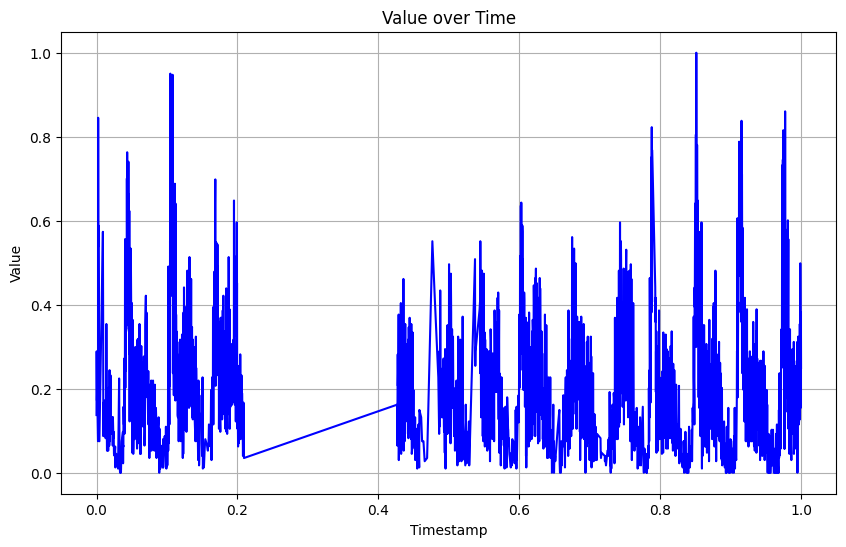

In [369]:
# Data Visualization

plt.figure(figsize=(10, 6))
plt.plot(df['timestamp_mm'], df['value'], color='blue')
plt.title('Value over Time')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.grid(True)
plt.show()

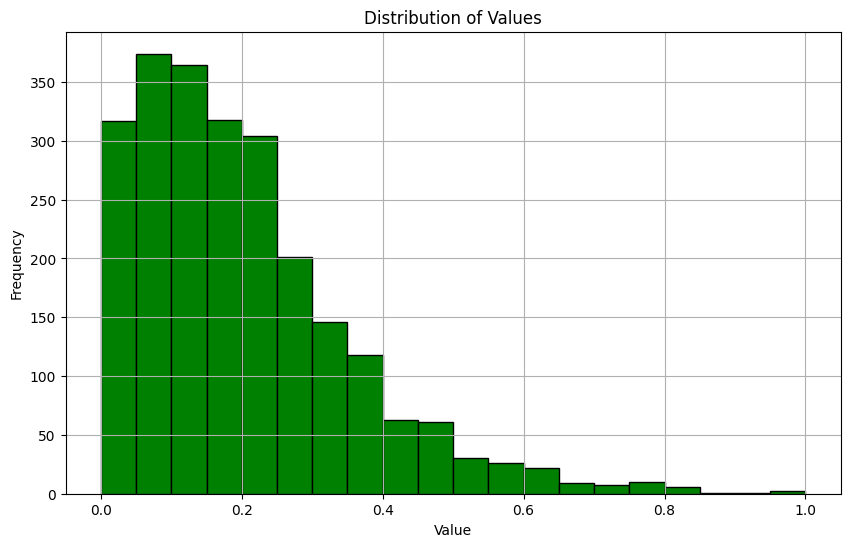

In [370]:
# Histogram Plot

plt.figure(figsize=(10, 6))
plt.hist(df['value'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


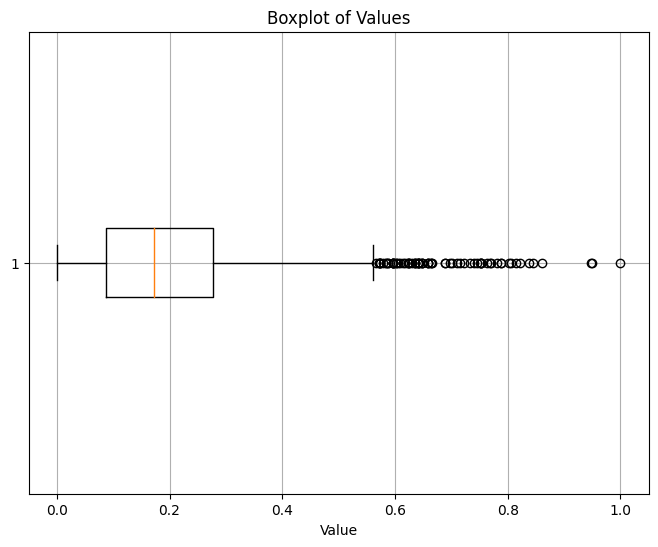

In [371]:
# Box Plot

plt.figure(figsize=(8, 6))
plt.boxplot(df['value'], vert=False)
plt.title('Boxplot of Values')
plt.xlabel('Value')
plt.grid(True)
plt.show()

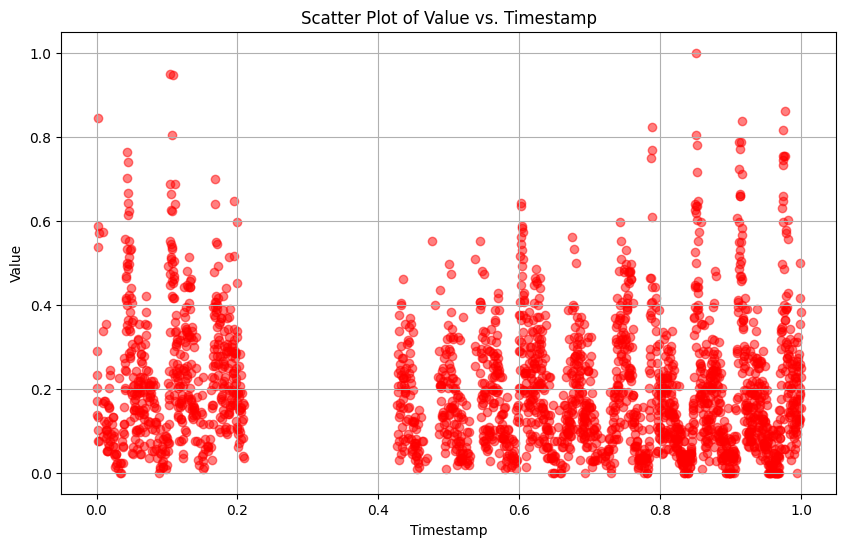

In [372]:
# Scatter Plot

plt.figure(figsize=(10, 6))
plt.scatter(df['timestamp_mm'], df['value'], color='red', alpha=0.5)
plt.title('Scatter Plot of Value vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.grid(True)
plt.show()


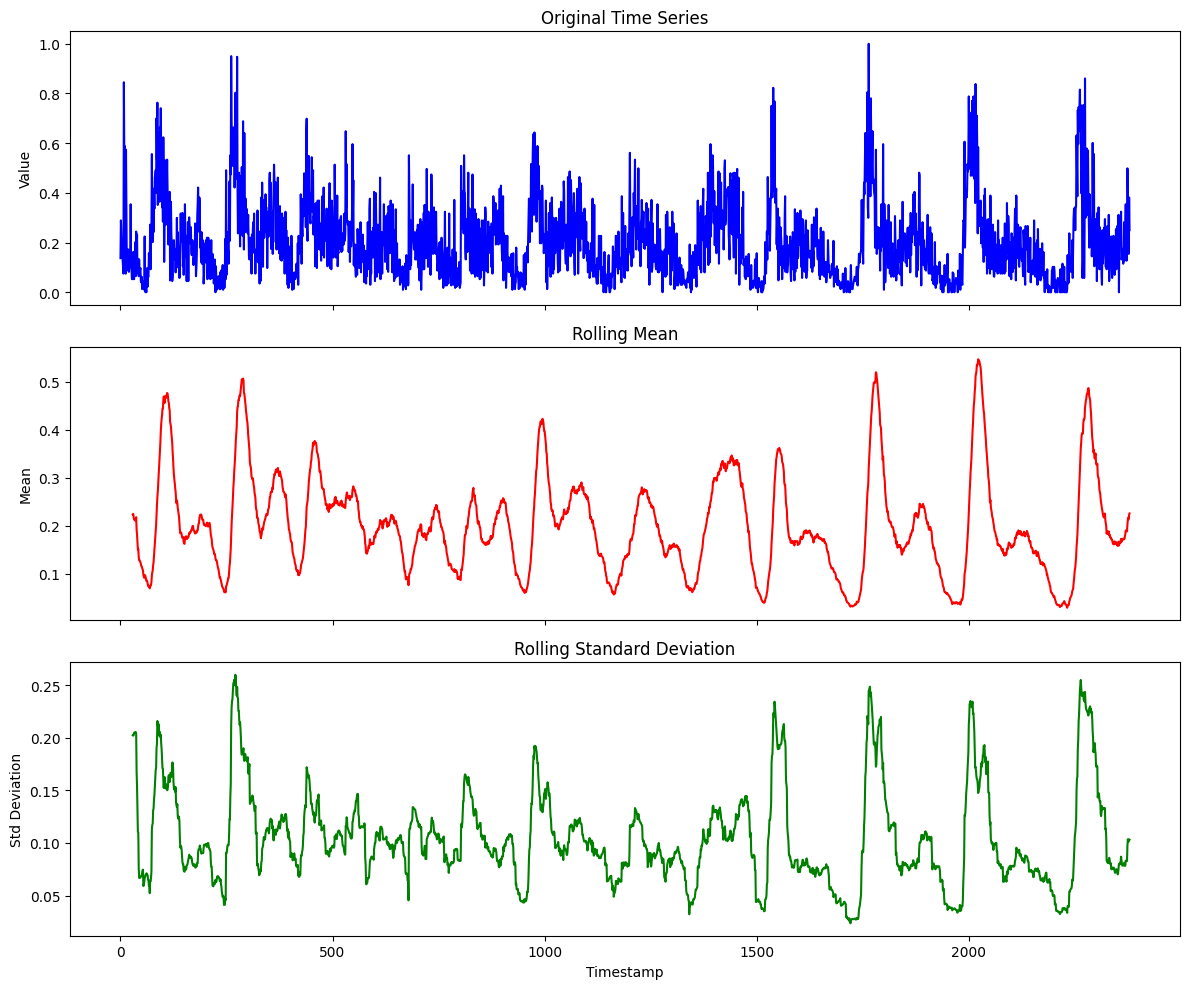

In [373]:
# Time series plot

rolling_mean = df['value'].rolling(window=30).mean()
rolling_std = df['value'].rolling(window=30).std()

fig, axis = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

axis[0].plot(df['value'], color='blue')
axis[0].set_title('Original Time Series')
axis[0].set_ylabel('Value')

axis[1].plot(rolling_mean, color='red')
axis[1].set_title(f'Rolling Mean')
axis[1].set_ylabel('Mean')

axis[2].plot(df.index, rolling_std, color='green')
axis[2].set_title(f'Rolling Standard Deviation')
axis[2].set_ylabel('Std Deviation')

plt.xlabel('Timestamp')
plt.tight_layout()
plt.show()


In [424]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [425]:
# Preparing dataset for training

from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.15, random_state=42)
X_train, X_val = train_test_split(X_train, test_size=0.15, random_state=42)

In [426]:
print("Training shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Testing shape:", X_test.shape)

Training shape: (1719, 2)
Validation shape: (304, 2)
Testing shape: (357, 2)


In [427]:
# Convert data to tensors
X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_val = torch.tensor(X_val.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)

In [428]:
# Create DataLoaders
train_loader = DataLoader(TensorDataset(X_train), batch_size=64, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val), batch_size=64, shuffle=False)
test_loader = DataLoader(TensorDataset(X_test), batch_size=64, shuffle=False)


In [429]:
# Autoencoder model building
# Import necessary modules

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [430]:
# Standard Encoder

class Autoencoder(nn.Module):
    def __init__(self, input_size, encoding_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, encoding_size),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_size, 64),
            nn.ReLU(),
            nn.Linear(64, input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [431]:
input_size = 10
encoding_size = 5
input_size = X_train.shape[1]

In [432]:
autoencoder = Autoencoder(input_size, encoding_size)

autoencoder.to(device)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=5, bias=True)
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=5, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=2, bias=True)
    (3): Sigmoid()
  )
)

In [433]:
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
criterion = nn.MSELoss()

In [434]:
epochs = 10
batch_size = 64

# List for training and validation losses
train_losses = []
val_losses = []

# Training for loop
for epoch in range(epochs):
    autoencoder.train()
    train_loss = 0.0

    # Parsing across training data in batches
    for i in range(0, len(X_train), batch_size):
        inputs = X_train[i:i+batch_size].to(device)
        optimizer.zero_grad()
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)

    # Calculating average training loss and adding it into the above dedined list
    train_loss /= len(X_train)
    train_losses.append(train_loss)

    # Validation loop
    autoencoder.eval()
    val_loss = 0.0

    with torch.no_grad():
        for i in range(0, len(X_val), batch_size):
            inputs = X_val[i:i+batch_size].to(device)
            outputs = autoencoder(inputs)
            loss = criterion(outputs, inputs)
            val_loss += loss.item() * inputs.size(0)

    # Calculating average validation loss and adding it into the above dedined list
    val_loss /= len(X_val)
    val_losses.append(val_loss)

    # Training and validation loss
    print(f'Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')


Epoch 1/10, Training Loss: 0.1112, Validation Loss: 0.0962
Epoch 2/10, Training Loss: 0.0838, Validation Loss: 0.0686
Epoch 3/10, Training Loss: 0.0602, Validation Loss: 0.0534
Epoch 4/10, Training Loss: 0.0508, Validation Loss: 0.0469
Epoch 5/10, Training Loss: 0.0439, Validation Loss: 0.0391
Epoch 6/10, Training Loss: 0.0360, Validation Loss: 0.0310
Epoch 7/10, Training Loss: 0.0282, Validation Loss: 0.0235
Epoch 8/10, Training Loss: 0.0214, Validation Loss: 0.0176
Epoch 9/10, Training Loss: 0.0169, Validation Loss: 0.0143
Epoch 10/10, Training Loss: 0.0146, Validation Loss: 0.0127


In [435]:
# Calculating re-construction error on test data

autoencoder.eval()

test_losses = []
with torch.no_grad():
    for i in range(0, len(X_test), batch_size):
        inputs = X_test[i:i+batch_size].to(device)
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        test_losses.append(loss.item())

In [436]:
# Printing reconstruction losses
for i, loss in enumerate(test_losses):
    print(f'Sample {i+1}, Reconstruction Loss: {loss:.4f}')

Sample 1, Reconstruction Loss: 0.0194
Sample 2, Reconstruction Loss: 0.0150
Sample 3, Reconstruction Loss: 0.0190
Sample 4, Reconstruction Loss: 0.0147
Sample 5, Reconstruction Loss: 0.0140
Sample 6, Reconstruction Loss: 0.0099


In [437]:
# Precision - Recall anomaly detection evaluation

test_losses_array = np.array(test_losses)
anomaly_score = test_losses_array
# Threshold based on reconstruction error
threshold = 0.0015
y_pred = (anomaly_score > threshold).astype(int)

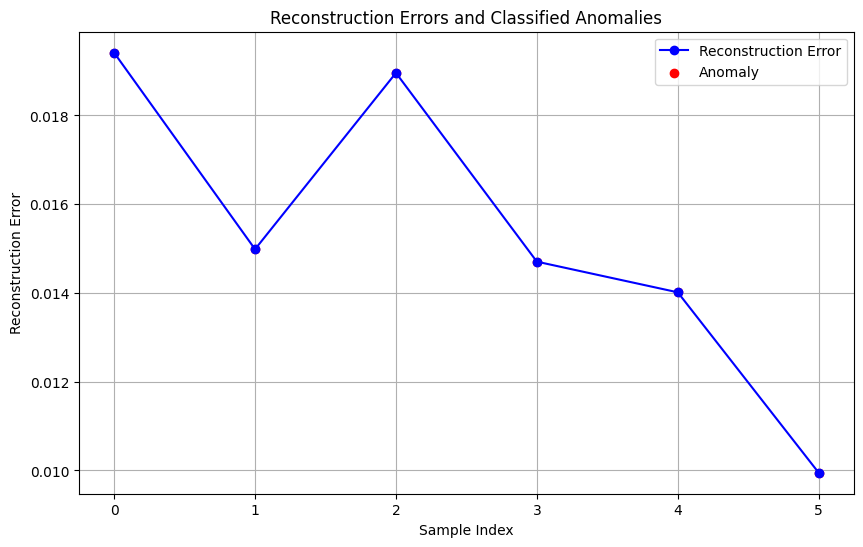

In [438]:
# Plot reconstruction errors and classified anomalies

plt.figure(figsize=(10, 6))
plt.plot(test_losses_array, marker='o', linestyle='-', color='b', label='Reconstruction Error')
plt.scatter(np.where(y_pred == 1)[0], test_losses_array[y_pred == 1], color='red', label='Anomaly')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Errors and Classified Anomalies')
plt.legend()
plt.grid(True)
plt.show()

In [439]:
val_loader = DataLoader(TensorDataset(X_val), batch_size=64, shuffle=False)

In [440]:
# Calculating performance on validation set
autoencoder.eval()

val_losses = []
with torch.no_grad():
    for batch_data in val_loader:
        inputs = batch_data[0].to(device)
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        val_losses.append(loss.item())

average_val_loss = sum(val_losses) / len(val_losses)

print(f"Average Validation Loss: {average_val_loss:.4f}")


Average Validation Loss: 0.0126


In [445]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

In [446]:
# LSTM Architecture
class LSTMAutoencoder(nn.Module):
    def __init__(self, input_size, hidden_size, encoding_size):
        super(LSTMAutoencoder, self).__init__()
        self.encoder = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.decoder = nn.LSTM(hidden_size, input_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, encoding_size)

    def forward(self, x):
        _, (hidden, _) = self.encoder(x)
        encoded = self.fc(hidden.squeeze(0))
        decoded, _ = self.decoder(encoded.unsqueeze(1))
        return decoded

In [447]:
# Reshaping data for PyTorch tensors
X = torch.tensor(df['value'].values.reshape(-1, 1, 1), dtype=torch.float32)

In [448]:
# Train, validation, test split
X_train_val, X_test = train_test_split(X, test_size=0.15, random_state=42)
X_train, X_val = train_test_split(X_train_val, test_size=0.15, random_state=42)

In [449]:
# Create DataLoaders
train_loader = DataLoader(TensorDataset(X_train), batch_size=64, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val), batch_size=64, shuffle=False)
test_loader = DataLoader(TensorDataset(X_test), batch_size=64, shuffle=False)

In [450]:
input_size = 1
hidden_size = 64
encoding_size = 10
epochs = 10
learning_rate = 0.001

In [451]:
LSTMAutoencoder = LSTMAutoencoder(input_size, hidden_size, encoding_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(LSTMAutoencoder.parameters(), lr=learning_rate)

In [452]:
# Training loop

for epoch in range(epochs):
    LSTMAutoencoder.train()
    train_loss = 0.0
    for batch_data in train_loader:
        inputs = batch_data[0]
        optimizer.zero_grad()
        outputs = LSTMAutoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    average_train_loss = train_loss / len(train_loader.dataset)

    # Validation loop
    LSTMAutoencoder.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_data in test_loader:
            inputs = batch_data[0]
            outputs = LSTMAutoencoder(inputs)
            loss = criterion(outputs, inputs)
            val_loss += loss.item() * inputs.size(0)
    average_val_loss = val_loss / len(test_loader.dataset)

    print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {average_train_loss:.4f}, Val Loss: {average_val_loss:.4f}')

Epoch [1/10], Train Loss: 0.0276, Val Loss: 0.0268
Epoch [2/10], Train Loss: 0.0219, Val Loss: 0.0231
Epoch [3/10], Train Loss: 0.0202, Val Loss: 0.0211
Epoch [4/10], Train Loss: 0.0176, Val Loss: 0.0173
Epoch [5/10], Train Loss: 0.0137, Val Loss: 0.0118
Epoch [6/10], Train Loss: 0.0083, Val Loss: 0.0057
Epoch [7/10], Train Loss: 0.0034, Val Loss: 0.0018
Epoch [8/10], Train Loss: 0.0011, Val Loss: 0.0006
Epoch [9/10], Train Loss: 0.0005, Val Loss: 0.0004
Epoch [10/10], Train Loss: 0.0005, Val Loss: 0.0004


In [453]:
# Evaluation Metrics

LSTMAutoencoder.eval()
test_losses = []
with torch.no_grad():
    for batch_data in test_loader:
        inputs = batch_data[0]
        outputs = LSTMAutoencoder(inputs)
        loss = criterion(outputs, inputs)
        test_losses.append(loss.item())
reconstruction_error = test_losses

In [454]:
reconstruction_error = np.array(reconstruction_error)
threshold = 0.0015
y_pred = (reconstruction_error > threshold).astype(int)

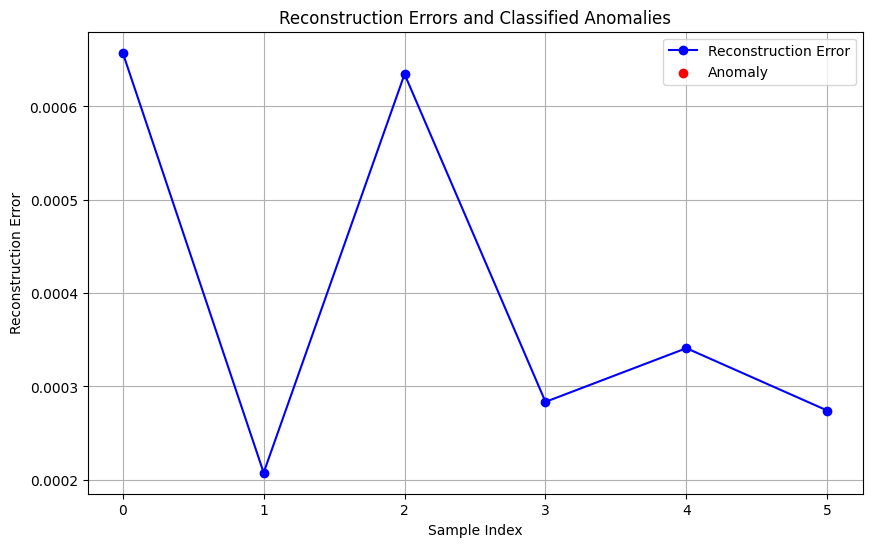

In [455]:
# Reconstruction errors and classified anomalies

plt.figure(figsize=(10, 6))
plt.plot(reconstruction_error, marker='o', linestyle='-', color='b', label='Reconstruction Error')
plt.scatter(np.where(y_pred == 1)[0], reconstruction_error[y_pred == 1], color='red', label='Anomaly')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Errors and Classified Anomalies')
plt.legend()
plt.grid(True)
plt.show()

In [466]:
# Fully connected autoencoder

class AnomalyDetectionAutoencoder(nn.Module):
    def __init__(self, input_size, encoding_size, hidden_sizes, activation):
        super(AnomalyDetectionAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, hidden_sizes[0]),
            activation,
            nn.Linear(hidden_sizes[0], hidden_sizes[1]),
            activation,
            nn.Linear(hidden_sizes[1], encoding_size),
            activation
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_size, hidden_sizes[1]),
            activation,
            nn.Linear(hidden_sizes[1], hidden_sizes[0]),
            activation,
            nn.Linear(hidden_sizes[0], input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [467]:
input_size = 1
encoding_size = 8
hidden_sizes = [16, 8]
activation = nn.ReLU()

In [468]:
# Create the autoencoder model
fc_autoencoder = AnomalyDetectionAutoencoder(input_size, encoding_size, hidden_sizes, activation)

In [469]:
# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=1e-3)

In [470]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
fc_autoencoder = AnomalyDetectionAutoencoder(input_size, encoding_size, hidden_sizes, activation)
fc_autoencoder.to(device)

AnomalyDetectionAutoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=1, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=8, bias=True)
    (5): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=8, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [471]:
# Training loop
epochs = 10

for epoch in range(epochs):
    fc_autoencoder.train()
    train_loss = 0
    for data in train_loader:
        inputs = data[0].to(device)
        optimizer.zero_grad()
        outputs = fc_autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)

    # Validation loop
    fc_autoencoder.eval()
    val_loss = 0
    with torch.no_grad():
        for data in val_loader:
            inputs = data[0].to(device)
            outputs = fc_autoencoder(inputs)
            loss = criterion(outputs, inputs)
            val_loss += loss.item()
    val_loss /= len(val_loader)

    # Training loss and validation loss
    print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

Epoch [1/10], Training Loss: 0.0996, Validation Loss: 0.0968
Epoch [2/10], Training Loss: 0.0997, Validation Loss: 0.0968
Epoch [3/10], Training Loss: 0.0997, Validation Loss: 0.0968
Epoch [4/10], Training Loss: 0.0997, Validation Loss: 0.0968
Epoch [5/10], Training Loss: 0.0996, Validation Loss: 0.0968
Epoch [6/10], Training Loss: 0.0997, Validation Loss: 0.0968
Epoch [7/10], Training Loss: 0.0998, Validation Loss: 0.0968
Epoch [8/10], Training Loss: 0.0997, Validation Loss: 0.0968
Epoch [9/10], Training Loss: 0.0997, Validation Loss: 0.0968
Epoch [10/10], Training Loss: 0.0997, Validation Loss: 0.0968


In [472]:
# Reconstruction error

X_test = X_val.to(device)
reconstructed = fc_autoencoder(X_test)
reconstruction_error = torch.mean(torch.abs(X_test - reconstructed), dim=1).cpu().detach().numpy()

In [473]:
# Defining threshold

threshold = np.percentile(reconstruction_error, 95)

In [474]:
# Classifying the anomalies

anomalies = (reconstruction_error > threshold).nonzero()[0]

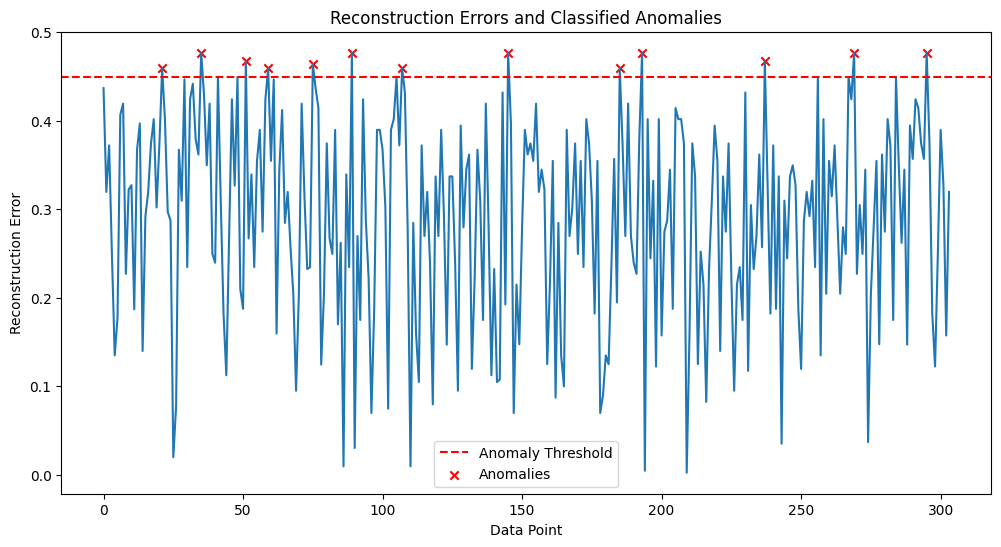

In [475]:
# Reconstruction errors and classified anomalies

plt.figure(figsize=(12, 6))
plt.plot(reconstruction_error)
plt.axhline(y=threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.scatter(anomalies, reconstruction_error[anomalies], c='r', marker='x', label='Anomalies')
plt.xlabel('Data Point')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Errors and Classified Anomalies')
plt.legend()
plt.show()

In [476]:
# Performance on validation set

fc_autoencoder.eval()
val_loss = 0

with torch.no_grad():
    for data in val_loader:
        inputs = data[0].to(device)
        outputs = fc_autoencoder(inputs)
        loss = criterion(outputs, inputs)
        val_loss += loss.item() * inputs.size(0)

average_val_loss = val_loss / len(val_loader.dataset)
print(f'Average Validation Loss: {average_val_loss:.4f}')

Average Validation Loss: 0.0964


In [477]:
class FinalAutoencoder(nn.Module):
    def __init__(self, input_size, encoding_size, hidden_sizes, activations):
        super(FinalAutoencoder, self).__init__()
        assert len(hidden_sizes) == len(activations), "Length of hidden_sizes must match length of activations"

        encoder_layers = []
        decoder_layers = []

        # Encoder layers
        prev_hidden_size = input_size
        for i in range(len(hidden_sizes)):
            encoder_layers.append(nn.Linear(prev_hidden_size, hidden_sizes[i]))
            encoder_layers.append(activations[i])
            prev_hidden_size = hidden_sizes[i]

        encoder_layers.append(nn.Linear(hidden_sizes[-1], encoding_size))
        self.encoder = nn.Sequential(*encoder_layers)

        # Decoder layers
        decoder_layers.append(nn.Linear(encoding_size, hidden_sizes[-1]))
        decoder_layers.append(activations[-1])

        for i in range(len(hidden_sizes) - 1, 0, -1):
            decoder_layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i-1]))
            decoder_layers.append(activations[i-1])

        decoder_layers.append(nn.Linear(hidden_sizes[0], input_size))
        decoder_layers.append(nn.Sigmoid())
        self.decoder = nn.Sequential(*decoder_layers)

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [478]:
# Hyperparameters

input_size = 1
encoding_size = 5
hidden_sizes = [32, 16, 8]
activations = [nn.ReLU(), nn.ReLU(), nn.ReLU()]
epochs = 10
batch_size = 64
learning_rate = 0.001

In [479]:
final_autoencoder = FinalAutoencoder(input_size, encoding_size, hidden_sizes, activations)
final_autoencoder.to(device)

FinalAutoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=1, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=8, bias=True)
    (5): ReLU()
    (6): Linear(in_features=8, out_features=5, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=5, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): Sigmoid()
  )
)

In [480]:
# Optimizer and Loss function
optimizer = optim.Adam(fc_autoencoder.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

In [481]:
fc_autoencoder.train()
train_losses = []
val_losses = []

In [482]:
for epoch in range(epochs):
    total_train_loss = 0.0
    total_val_loss = 0.0

    # Training loop
    for batch_data in train_loader:
        inputs = batch_data[0].to(device)
        optimizer.zero_grad()
        outputs = final_autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item() * inputs.size(0)

    average_train_loss = total_train_loss / len(train_loader.dataset)
    train_losses.append(average_train_loss)

    # Validation loop
    fc_autoencoder.eval()
    with torch.no_grad():
        for batch_data in val_loader:
            inputs = batch_data[0].to(device)
            outputs = final_autoencoder(inputs)
            loss = criterion(outputs, inputs)

            total_val_loss += loss.item() * inputs.size(0)

    average_val_loss = total_val_loss / len(val_loader.dataset)
    val_losses.append(average_val_loss)

    # Training and validation loss
    print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {average_train_loss:.4f}, Validation Loss: {average_val_loss:.4f}')

Epoch [1/10], Training Loss: 0.0921, Validation Loss: 0.0888
Epoch [2/10], Training Loss: 0.0921, Validation Loss: 0.0888
Epoch [3/10], Training Loss: 0.0921, Validation Loss: 0.0888
Epoch [4/10], Training Loss: 0.0921, Validation Loss: 0.0888
Epoch [5/10], Training Loss: 0.0921, Validation Loss: 0.0888
Epoch [6/10], Training Loss: 0.0921, Validation Loss: 0.0888
Epoch [7/10], Training Loss: 0.0921, Validation Loss: 0.0888
Epoch [8/10], Training Loss: 0.0921, Validation Loss: 0.0888
Epoch [9/10], Training Loss: 0.0921, Validation Loss: 0.0888
Epoch [10/10], Training Loss: 0.0921, Validation Loss: 0.0888


In [483]:
# Reconstruction error

X_test = X_val.to(device)
reconstructed = final_autoencoder(X_test)
reconstruction_error = torch.mean(torch.abs(X_test - reconstructed), dim=1).cpu().detach().numpy()

In [484]:
# Defining threshold

threshold = np.percentile(reconstruction_error, 50)

In [485]:
# Classifying the anomalies

anomalies = (reconstruction_error > threshold).nonzero()[0]

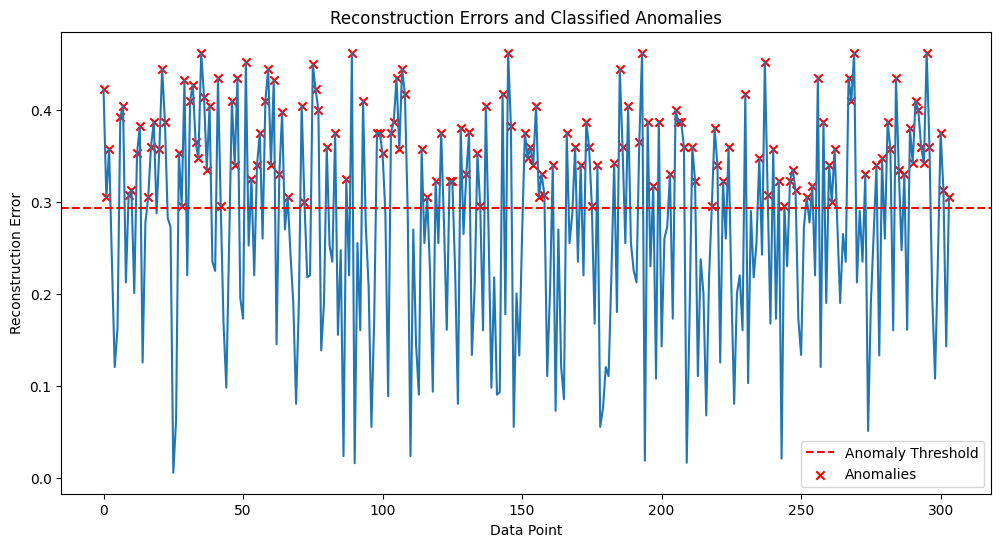

In [486]:
# Reconstruction errors and classified anomalies

plt.figure(figsize=(12, 6))
plt.plot(reconstruction_error)
plt.axhline(y=threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.scatter(anomalies, reconstruction_error[anomalies], c='r', marker='x', label='Anomalies')
plt.xlabel('Data Point')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Errors and Classified Anomalies')
plt.legend()
plt.show()

In [487]:
# Evaluation on validation set

final_autoencoder.eval()

val_losses = []

with torch.no_grad():
    for batch_data in val_loader:
        inputs = batch_data[0].to(device)
        outputs = final_autoencoder(inputs)
        loss = criterion(outputs, inputs)
        val_losses.append(loss.item())

average_val_loss = np.mean(val_losses)
print(f'Average Validation Loss: {average_val_loss:.4f}')

Average Validation Loss: 0.0893


In [488]:
# Saving weights of the model with best results
torch.save(autoencoder.state_dict(), 'best_model.pth')

In [501]:
# List for training and validation losses
train_losses = []
val_losses = []

# Training loop
for epoch in range(epochs):
    autoencoder.train()
    train_loss = 0.0

    for batch_data in train_loader:
        inputs = batch_data[0].to(device)
        optimizer.zero_grad()
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)

    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation loop
    autoencoder.eval()
    val_loss = 0.0

    with torch.no_grad():
        for batch_data in val_loader:
            inputs = batch_data[0].to(device)
            outputs = autoencoder(inputs)
            loss = criterion(outputs, inputs)
            val_loss += loss.item() * inputs.size(0)

    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)

    print(f'Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

Epoch 1/10, Training Loss: 0.0020, Validation Loss: 0.0014
Epoch 2/10, Training Loss: 0.0016, Validation Loss: 0.0011
Epoch 3/10, Training Loss: 0.0014, Validation Loss: 0.0010
Epoch 4/10, Training Loss: 0.0011, Validation Loss: 0.0008
Epoch 5/10, Training Loss: 0.0010, Validation Loss: 0.0007
Epoch 6/10, Training Loss: 0.0009, Validation Loss: 0.0006
Epoch 7/10, Training Loss: 0.0008, Validation Loss: 0.0005
Epoch 8/10, Training Loss: 0.0007, Validation Loss: 0.0005
Epoch 9/10, Training Loss: 0.0006, Validation Loss: 0.0004
Epoch 10/10, Training Loss: 0.0005, Validation Loss: 0.0004


In [502]:
# Testing loss
autoencoder.eval()
test_loss = 0.0

with torch.no_grad():
    for batch_data in test_loader:
        inputs = batch_data[0].to(device)
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        test_loss += loss.item() * inputs.size(0)

# Calculating average testing loss
test_loss /= len(test_loader.dataset)

# Print testing loss
print(f'Testing Loss: {test_loss:.4f}')

Testing Loss: 0.0004


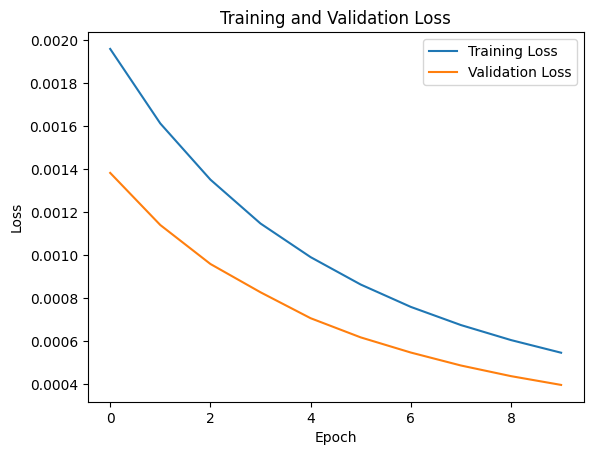

In [503]:
# Plotting the training and validation losses

plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

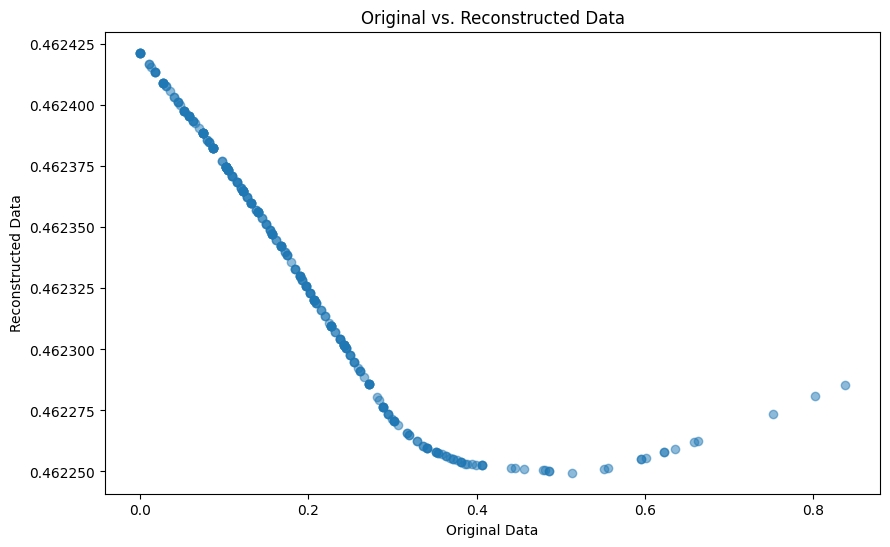

In [511]:
# Original vs. Reconstructed Data

plt.figure(figsize=(10, 6))
plt.scatter(X_test_array, reconstructed_array, alpha=0.5)
plt.xlabel('Original Data')
plt.ylabel('Reconstructed Data')
plt.title('Original vs. Reconstructed Data')
plt.show()
